In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_dataset = pd.read_csv("../data/model/IBD_model_dataset_rna_ID.csv")

In [3]:
df_dataset.head()

,Participant_ID,External_ID,Biopsy_location,Diagnosis,Gender,UncTepi3,Unc004ii,Unc00re8,Unc018j2,Unc58370,...,SLC51B,SLCO2B1,CYP1A2,CYP2A6,CYP2D6,CYP2E1,CYP3A4,CYP3A5,SULT1A1,SULT1A3
0,C3002,206618,Sigmoid Colon,CD,Female,0,0,0,1,2,...,1271,1984,0,0,21,2,44,1529,3252,4
1,C3003,206622,Sigmoid Colon,UC,Female,0,0,0,0,0,...,2155,3316,0,1,49,5,379,1312,2606,1
2,C3004,206625,Sigmoid Colon,UC,Female,0,0,0,0,0,...,747,5416,0,0,78,12,233,750,978,1
3,C3005,206628,Rectum,UC,Female,0,0,0,0,0,...,1341,1020,0,0,16,4,296,11824,1707,1
4,C3006,206630,Rectum,UC,Male,0,0,0,0,0,...,692,3759,1,1,35,7,124,1485,1114,1


In [4]:
df_dataset.columns[5:]

Index(['UncTepi3', 'Unc004ii', 'Unc00re8', 'Unc018j2', 'Unc58370', 'Unc05fip',
       'Unc02ae9', 'GV2Pseu5', 'Unc02q5c', 'Unc003tx',
       ...
       'SLC51B', 'SLCO2B1', 'CYP1A2', 'CYP2A6', 'CYP2D6', 'CYP2E1', 'CYP3A4',
       'CYP3A5', 'SULT1A1', 'SULT1A3'],
      dtype='object', length=819)

In [10]:
corr = df_dataset.iloc[:,5:].corr()
# Set a threshold for correlation
threshold = 0.7

# Filter the correlation matrix to retain only highly correlated pairs
highly_correlated_pairs = (corr.abs() > threshold) & (corr != 1)

# Create a masked correlation matrix to display only highly correlated pairs
masked_correlation_matrix = corr.where(highly_correlated_pairs)


<Axes: >

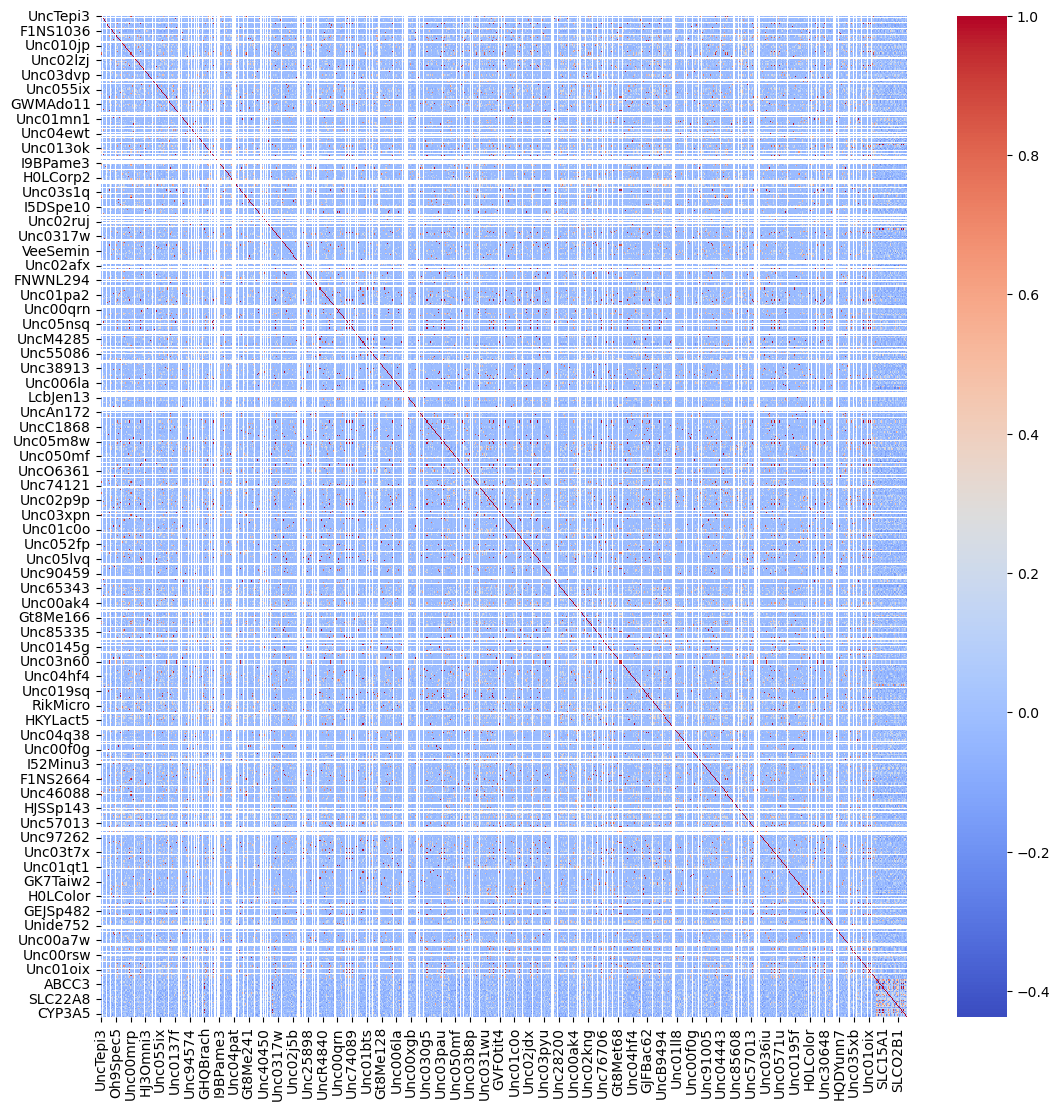

In [16]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corr, cmap='coolwarm', ax=ax)

/Users/karenjogi/miniconda3/envs/mlxai_2024_team_bhushan/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/karenjogi/miniconda3/envs/mlxai_2024_team_bhushan/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


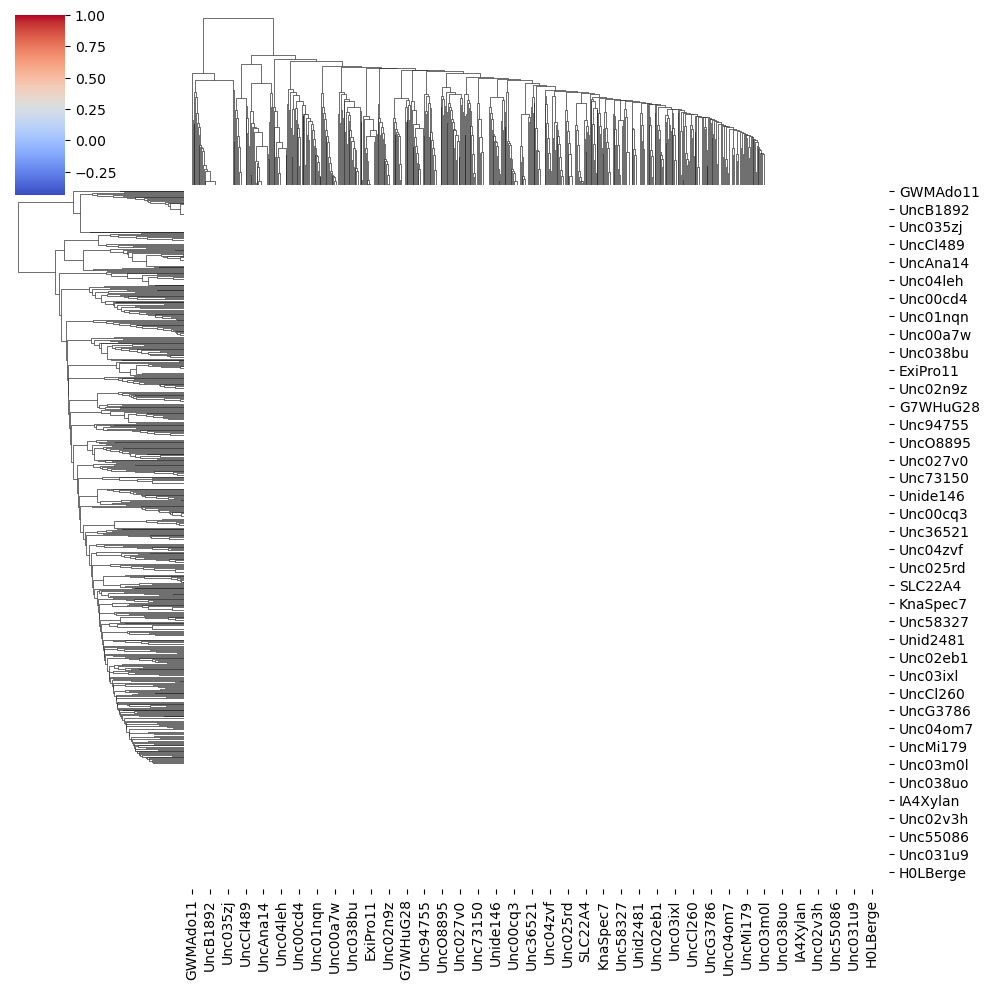

In [21]:
corr_dropna = corr.fillna(0)
# fig, ax = plt.subplots(figsize=(13, 13))
sns.clustermap(corr_dropna, cmap='coolwarm', linewidths=0.5)

In [298]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

df_bacteria_abundance = df_dataset.iloc[:,5:-31]
df_human_gene_abundance = df_dataset.iloc[:,-31:]

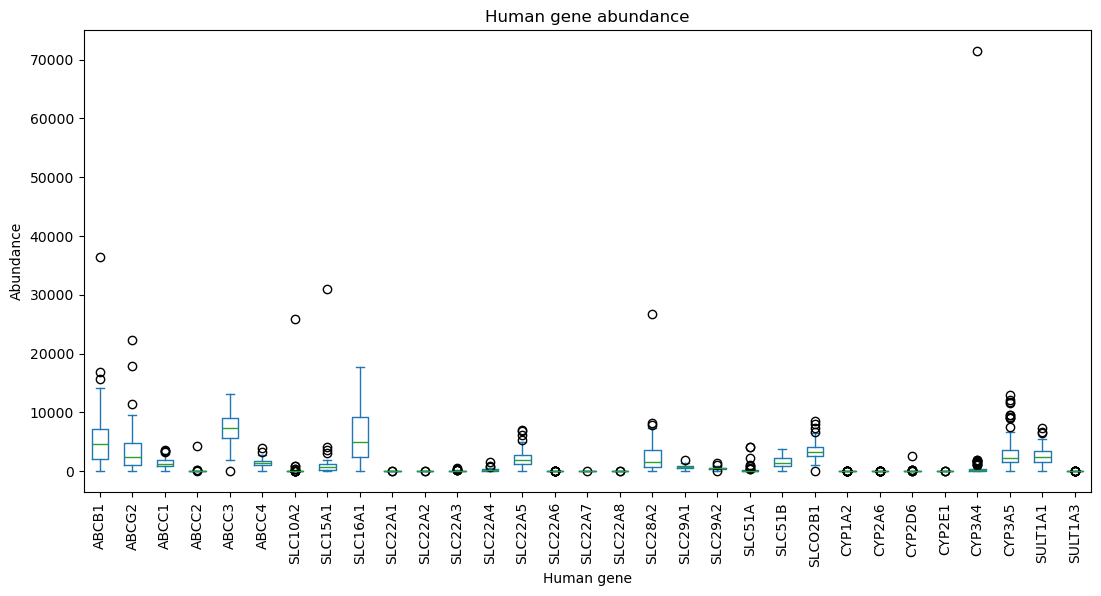

In [299]:
fig, ax = plt.subplots(figsize=(13, 6))
df_human_gene_abundance.plot(kind='box', ax=ax)
plt.xticks(rotation=90)
plt.title("Human gene abundance")
plt.xlabel("Human gene")
plt.ylabel("Abundance")
plt.savefig("../results/figures/Human_Gene_Abundance_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [300]:
df_bacteria_abundance = pd.DataFrame(scaler.fit_transform(df_bacteria_abundance), columns=df_bacteria_abundance.columns)
df_human_gene_abundance = pd.DataFrame(scaler.fit_transform(df_human_gene_abundance), columns=df_human_gene_abundance.columns)

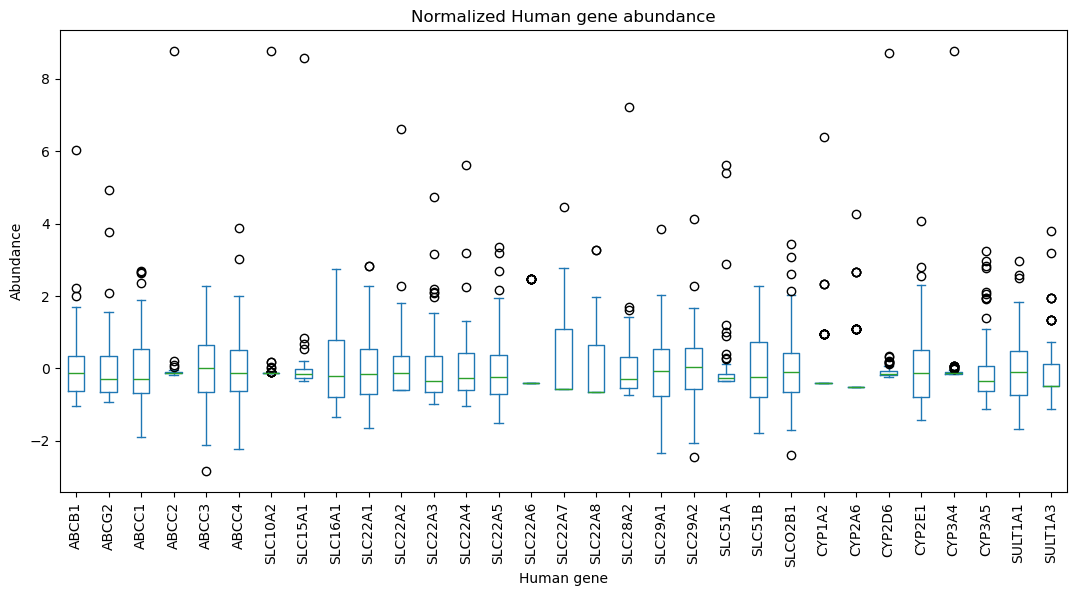

In [436]:
fig, ax = plt.subplots(figsize=(13, 6))
df_human_gene_abundance.plot(kind='box', ax=ax)
plt.xticks(rotation=90)
plt.title("Normalized Human gene abundance")
plt.xlabel("Human gene")
plt.ylabel("Abundance")
plt.savefig("../results/figures/Normalized_Human_Gene_Abundance.png", dpi=300, bbox_inches='tight')
plt.show()

In [302]:
pca = PCA(n_components=3)
df_bacteria_abundance_pca = pca.fit_transform(df_bacteria_abundance)

In [303]:
col_names = ["PC" + str(i) for i in range(1, len(pca.components_)+1)]
df_bacteria_abundance_pca = pd.DataFrame(df_bacteria_abundance_pca, columns=col_names)

In [304]:
df_bacteria_abundance_pca

,PC1,PC2,PC3
0,2.043196,13.635337,-2.749923
1,-1.561106,-3.409545,0.843896
2,-0.324843,4.372706,-1.223672
3,1.482650,-4.098948,-1.240861
4,-1.403802,7.800934,5.920446
...,...,...,...
73,-0.922245,-2.539030,0.918012
74,-1.499745,-4.375157,0.951179
75,-1.512216,-3.695990,0.808780
76,-0.869607,-4.095367,0.288703


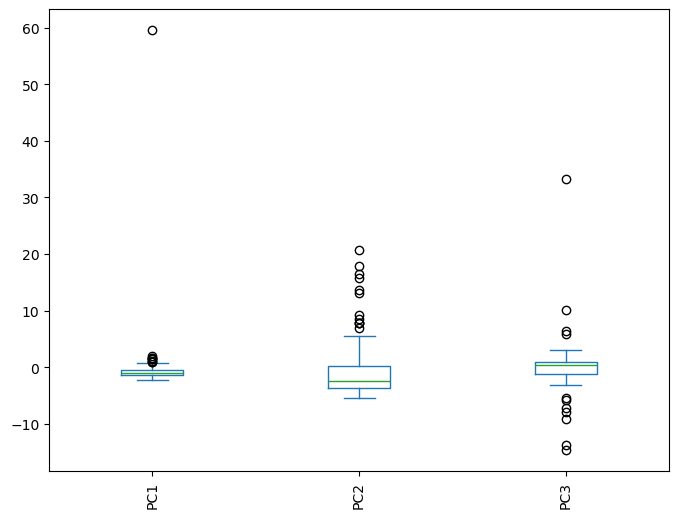

In [305]:
fig, ax = plt.subplots(figsize=(8, 6))
df_bacteria_abundance_pca.plot(kind='box', ax=ax)
plt.xticks(rotation=90)
# plt.title("Normalized Human gene abundance")
# plt.xlabel("Human gene")
# plt.ylabel("Abundance")
plt.show()

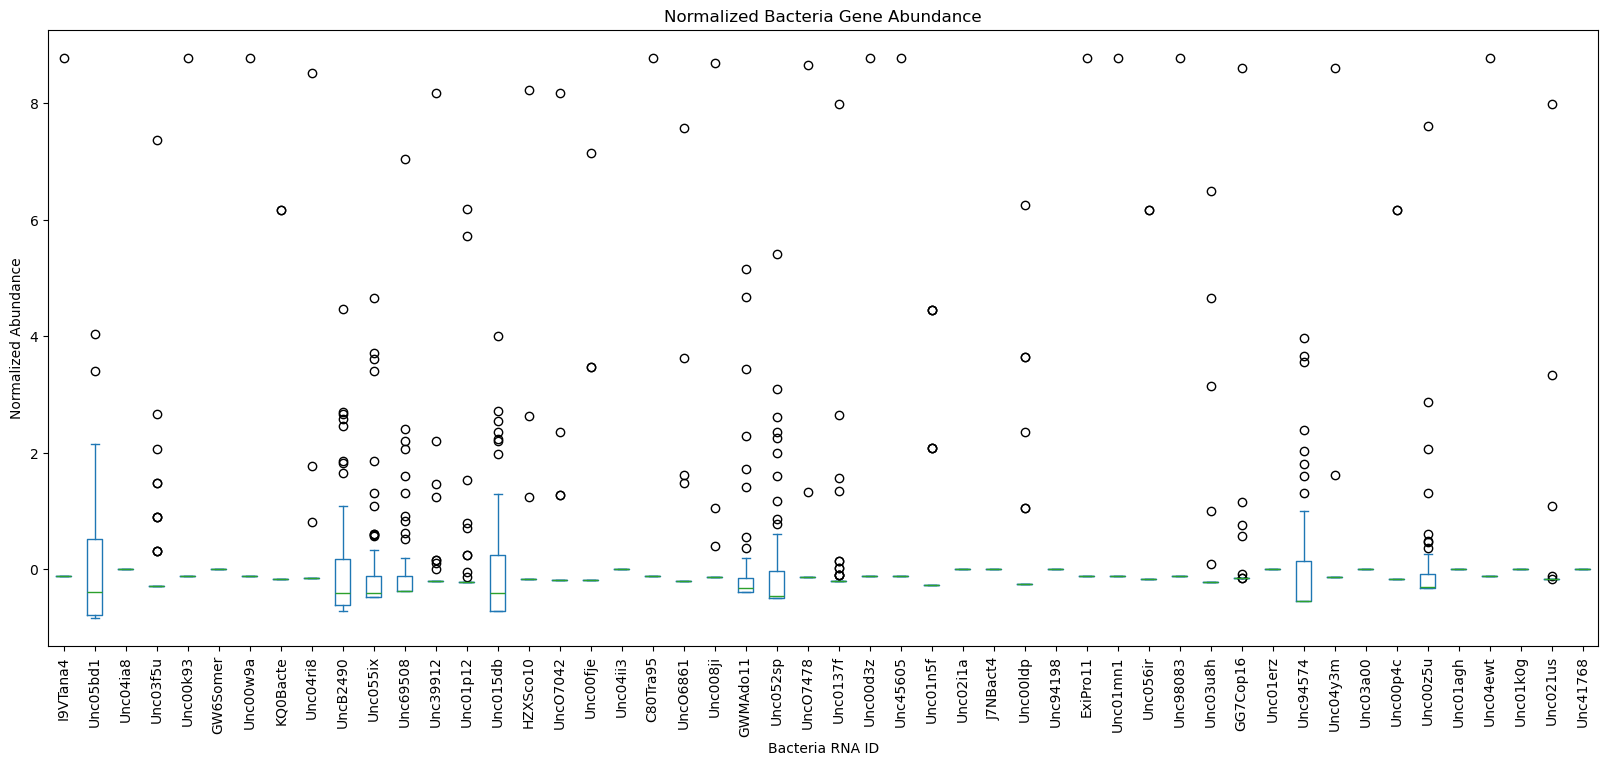

In [306]:
fig, ax = plt.subplots(figsize=(20, 8))
df_bacteria_abundance.iloc[:,50:100].plot(kind='box', ax=ax)
plt.xticks(rotation=90)
plt.title("Normalized Bacteria Gene Abundance")
plt.xlabel("Bacteria RNA ID")
plt.ylabel("Normalized Abundance")
plt.show()

In [419]:
##### To reproduce the results run for y = df_human_gene_abundance.iloc[:,0], 8 and -5

X = df_bacteria_abundance_pca
y = df_human_gene_abundance.iloc[:,0]

In [420]:
df_model = pd.concat([X, y], axis=1)

In [421]:
df_model

,PC1,PC2,PC3,ABCB1
0,2.043196,13.635337,-2.749923,-0.609943
1,-1.561106,-3.409545,0.843896,0.520950
2,-0.324843,4.372706,-1.223672,-0.828103
3,1.482650,-4.098948,-1.240861,-0.241152
4,-1.403802,7.800934,5.920446,-0.932416
...,...,...,...,...
73,-0.922245,-2.539030,0.918012,0.408075
74,-1.499745,-4.375157,0.951179,-0.684674
75,-1.512216,-3.695990,0.808780,-0.763492
76,-0.869607,-4.095367,0.288703,0.177070


In [422]:
# Extract the last column
last_column = df_model.iloc[:, -1]

# Calculate z-scores for the last column
z_scores_last_column = (last_column - last_column.mean()) / last_column.std()

# Define threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers in the last column
outliers_last_column = (z_scores_last_column.abs() > threshold)

# Drop rows containing outliers from the dataset
df_model = df_model[~outliers_last_column]

In [423]:
df_model.shape

(77, 4)

In [424]:
import jenkspy

breaks = jenkspy.jenks_breaks(df_model.iloc[:,-1], n_classes=3)

In [425]:
df_model[df_model.columns[-1]+"_classes"] = pd.cut(df_model.iloc[:,-1], bins=breaks, labels=range(len(breaks)-1))

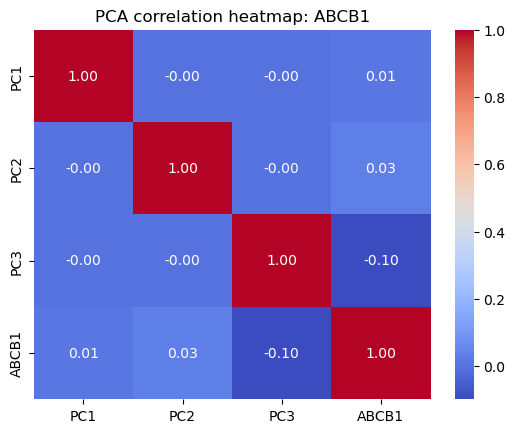

In [426]:
sns.heatmap(df_model.iloc[:,:-1].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f"PCA correlation heatmap: {df_model.columns[-2]}")
plt.show()

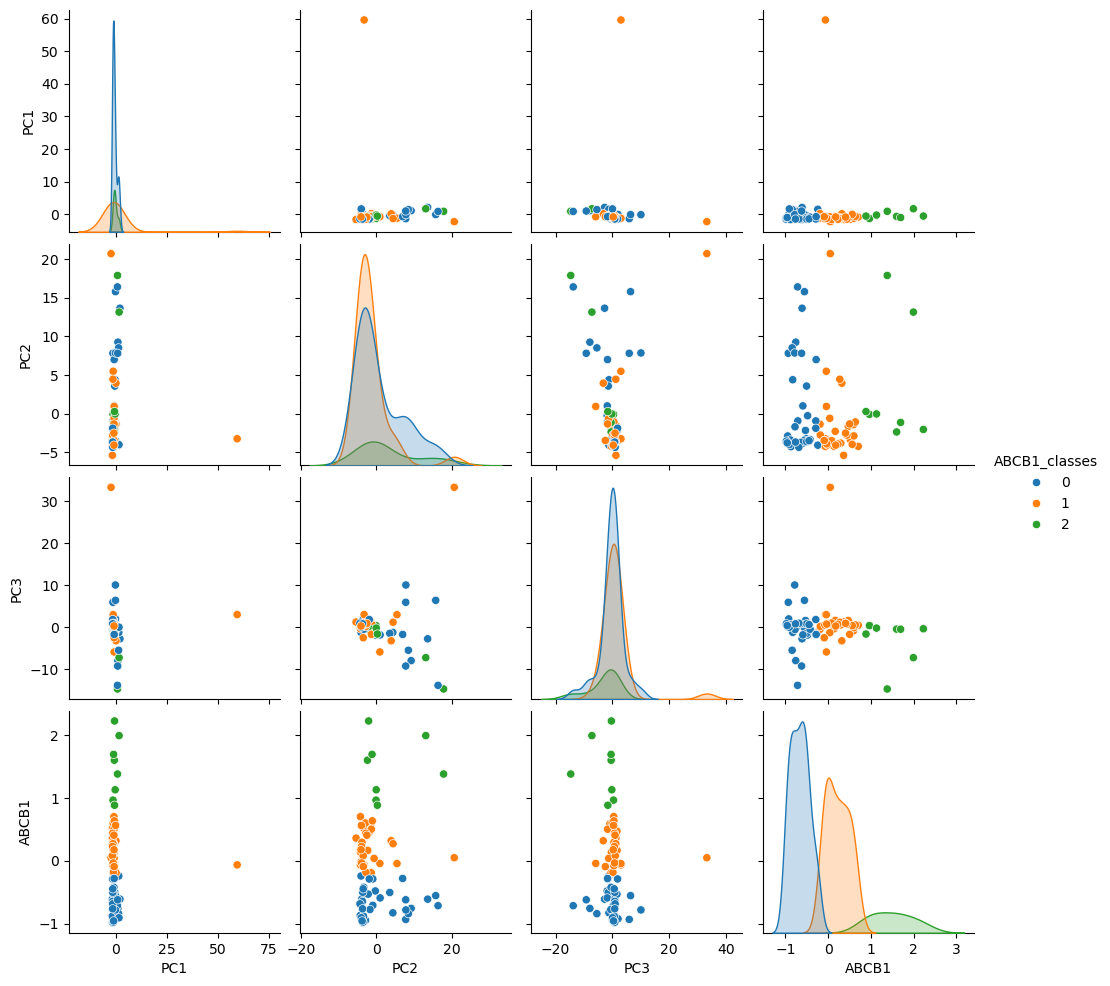

In [427]:
sns.pairplot(df_model, hue=df_model.columns[-1])

Remove any Outliers using z-score

In [428]:
# # Extract the last column
# last_column = df_model.iloc[:, -1]

# # Calculate z-scores for the last column
# z_scores_last_column = (last_column - last_column.mean()) / last_column.std()

# # Define threshold for outlier detection (e.g., 3 standard deviations)
# threshold = 3

# # Identify outliers in the last column
# outliers_last_column = (z_scores_last_column.abs() > threshold)

# # Drop rows containing outliers from the dataset
# cleaned_df = df_model[~outliers_last_column]

# Calculate z-scores for each column
# z_scores = (df_model - df_model.mean()) / df_model.std()

# # Define threshold for outlier detection (e.g., 3 standard deviations)
# threshold = 3

# # Identify outliers
# outliers = (z_scores > threshold) | (z_scores < -threshold)

# # Drop outliers from the dataset
# cleaned_df = df_model[~outliers.any(axis=1)]

In [429]:
# sns.pairplot(cleaned_df)

In [430]:
cleaned_df = df_model.drop(columns=df_model.columns[-2]).dropna()
cleaned_df.shape

(76, 4)

Regression Analysis

In [431]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import cross_val_score, LeaveOneOut
# from sklearn.metrics import mean_squared_error, r2_score
# import statsmodels.api as sm

# X = cleaned_df.iloc[:, :-1]
# y = cleaned_df.iloc[:, -1]

# model = sm.OLS(y, sm.add_constant(X)).fit()

# # Get the residuals
# residuals = model.resid

# # Plot residuals vs. fitted values
# plt.figure(figsize=(8, 6))
# plt.scatter(model.fittedvalues, residuals)
# plt.xlabel("Fitted Values")
# plt.ylabel("Residuals")
# plt.title("Residuals vs. Fitted Values Plot")
# plt.show()

# # Plot histogram of residuals
# plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=20)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Histogram of Residuals")
# plt.show()

# # Q-Q plot of residuals
# sm.qqplot(residuals, line='s')
# plt.title("Q-Q Plot of Residuals")
# plt.show()

# # Perform Durbin-Watson test
# durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
# print("Durbin-Watson statistic:", durbin_watson_statistic)

In [432]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from catboost import CatBoostRegressor
# # from lightgbm import LGBMRegressor


# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(cleaned_df.iloc[:, :-1], cleaned_df.iloc[:, -1], test_size=0.3, random_state=42)


# # Define models and hyperparameters to tune
# models = {
#     "Linear Regression": (LinearRegression(), {}),
#     "Ridge Regression": (Ridge(), {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}),
#     "Lasso Regression": (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
#     "Support Vector Machine": (SVR(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.01, 0.001]}),
#     "Random Forest": (RandomForestRegressor(), {'n_estimators': [5, 20, 30], 'max_depth': [2, 3, 4, 5]}),
#     "CatBoost": (CatBoostRegressor(verbose=False), {'iterations': [30, 40, 50], 'learning_rate': [0.01, 0.1, 0.5], 'depth': [2, 3, 4, 5], 'l2_leaf_reg': [1, 3, 5]}),
# }

# # Perform Grid Search Cross-Validation for each model
# for name, (model, param_grid) in models.items():
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring=['neg_mean_squared_error', 'r2'], refit='r2')
#     grid_search.fit(X_train, y_train)
    
#     # Get best hyperparameters
#     best_errors = grid_search.best_score_
#     best_params = grid_search.best_params_
#     print(f"Best Hyperparameters for {name}: {best_params}")
#     print(f"Best Errors for {name}: {best_errors}")
    
#     # Evaluate model with best hyperparameters
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{name} - MSE:", mse)
#     print(f"{name} - R-squared:", r2)
#     print("-----------------------------------------")

In [433]:
cleaned_df.isna().sum()

PC1              0
PC2              0
PC3              0
ABCB1_classes    0
dtype: int64

Classification Analysis

In [434]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
import pickle
warnings.filterwarnings("ignore")

from catboost import CatBoostClassifier

# Assuming 'cleaned_df' contains your dataset where the last column is the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_df.iloc[:, :-1], cleaned_df.iloc[:, -1], test_size=0.3, random_state=42, stratify=cleaned_df.iloc[:, -1])

# Define models and hyperparameters to tune
models = {
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1.0, 10.0], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}),
    "Support Vector Machine": (SVC(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1.0, 10.0]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [5, 20, 30], 'max_depth': [2, 3, 4, 5]}),
    "CatBoost": (CatBoostClassifier(verbose=False), {'iterations': [40, 50, 100], 'learning_rate': [0.01, 0.1, 0.5], 'depth': [2, 3, 4, 5], 'l2_leaf_reg': [1, 3, 5]}),
}

best_models = {}

# Perform Grid Search Cross-Validation for each model
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', refit=True)
    grid_search.fit(X_train, y_train)
    
    # Get best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {name}: {best_params}")
    
    # Evaluate model with best hyperparameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy:", accuracy)

    print(classification_report(y_test, y_pred))
    print("-----------------------------------------")


path = "../results/classification_models/"
model_name = df_model.columns[-1][:-8] + "_models.pkl"

# Save the best_model dictionary to a pickle file
with open(path+model_name, 'wb') as f:
    pickle.dump(best_models, f)


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Logistic Regression - Accuracy: 0.43478260869565216
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.47      0.70      0.56        10
           2       0.00      0.00      0.00         2

    accuracy                           0.43        23
   macro avg       0.28      0.32      0.29        23
weighted avg       0.38      0.43      0.39        23

-----------------------------------------
Best Hyperparameters for Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Support Vector Machine - Accuracy: 0.4782608695652174
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.47      0.90      0.62        10
           2       0.00      0.00      0.00         2

    accuracy                           0.48        23
   macro avg       0.32      0.36      0.30 

'SLC16A1'

In [320]:
# One-hot encode the target variable if it's multi-class
if len(y_train.unique()) > 2:  # Check if multi-class
    encoder = OneHotEncoder()
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()
else:
    y_train_encoded = y_train
    y_test_encoded = y_test

In [324]:
y_test_encoded.shape

(24, 3)

In [235]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_df.iloc[:, :-1], cleaned_df.iloc[:, -1], test_size=0.3, random_state=42)


reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [236]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [237]:
mse, r2

(0.9702357514896591, -0.6925682299183693)

In [238]:
reg = RandomForestRegressor(n_estimators=50, max_depth=4, verbose=True)
reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


RandomForestRegressor(max_depth=4, n_estimators=50, verbose=True)

In [239]:
reg.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47359453e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.88998281e-04,
       0.00000000e+00, 9.75788310e-05, 0.00000000e+00, 0.00000000e+00,
       2.96110930e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.71002341e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.88254089e-04, 0.00000000e+00, 7.30624583e-03,
       8.70916856e-05, 0.00000000e+00, 2.35753003e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.43912066e-04,
       0.00000000e+00, 9.56329514e-03, 0.00000000e+00, 2.51438633e-03,
       0.00000000e+00, 4.36228969e-04, 0.00000000e+00, 6.19145054e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.11503456e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [240]:
reg = RandomForestRegressor(n_estimators=50, max_depth=4, verbose=True)
reg.fit(X_train.iloc[:,[0,1,-1]], y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestRegressor(max_depth=4, n_estimators=50, verbose=True)

In [241]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- A6BRick6
- A6BStoq4
- BcsCoa64
- BcsS4691
- C80Tra95
- ...


In [223]:
mse, r2

(1.0026381083178664, -0.022741099721006464)